In [1]:
from numpy import *

def loadSimpData():
    datMat = matrix([[ 1. ,  2.1],
        [ 2. ,  1.1],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat,classLabels

In [4]:
datMat, classLabels = loadSimpData()

In [8]:
def stumpClassify(dataMatrix,dimen,threshVal,threshIneq):#just classify the data
    retArray = ones((shape(dataMatrix)[0],1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > threshVal] = -1.0
    return retArray
    

def buildStump(dataArr,classLabels,D):
    dataMatrix = mat(dataArr); labelMat = mat(classLabels).T
    m,n = shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = mat(zeros((m,1)))
    minError = inf #init error sum, to +infinity
    for i in range(n):#loop over all dimensions
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max();
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):#loop over all range in current dimension
            for inequal in ['lt', 'gt']: #go over less than and greater than
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)#call stump classify with i, j, lessThan
                errArr = mat(ones((m,1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr  #calc total error multiplied by D
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst

In [9]:
D = mat(ones((5, 1))/5)

In [10]:
buildStump(datMat, classLabels, D)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.50, thresh ineq

({'dim': 0, 'ineq': 'lt', 'thresh': 1.3}, matrix([[ 0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [13]:
def adaBoostTrainDS(dataArr,classLabels,numIt=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m)   #init D to all equal
    aggClassEst = mat(zeros((m,1)))
    for i in range(numIt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)#build Stump
        print("D:",D.T)
        alpha = float(0.5*log((1.0-error)/max(error,1e-16)))#calc alpha, throw in max(error,eps) to account for error=0
        bestStump['alpha'] = alpha  
        weakClassArr.append(bestStump)                  #store Stump Params in Array
        print("classEst: ",classEst.T)
        expon = multiply(-1*alpha*mat(classLabels).T,classEst) #exponent for D calc, getting messy
        D = multiply(D,exp(expon))                              #Calc New D for next iteration
        D = D/D.sum()
        #calc training error of all classifiers, if this is 0 quit for loop early (use break)
        aggClassEst += alpha*classEst
        print("aggClassEst: ",aggClassEst.T)
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total error: ",errorRate)
        if errorRate == 0.0: break
    return weakClassArr

In [14]:
classifierArray = adaBoostTrainDS(datMat, classLabels, 9)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.50, thresh ineq

In [15]:
classifierArray

[{'alpha': 0.6931471805599453, 'dim': 0, 'ineq': 'lt', 'thresh': 1.3},
 {'alpha': 0.9729550745276565, 'dim': 1, 'ineq': 'lt', 'thresh': 1.0},
 {'alpha': 0.8958797346140273,
  'dim': 0,
  'ineq': 'lt',
  'thresh': 0.90000000000000002}]

In [16]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = mat(datToClass)#do stuff similar to last aggClassEst in adaBoostTrainDS
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'],\
                                 classifierArr[i]['thresh'],\
                                 classifierArr[i]['ineq'])#call stump classify
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [17]:
datArr, labelArr = loadSimpData()
classifierArr = adaBoostTrainDS(datArr, labelArr, 30)
adaClassify([0, 0], classifierArr)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.50, thresh ineq

matrix([[-1.]])

In [18]:
adaClassify([[5, 5], [0, 0]], classifierArr)

[[ 0.69314718]
 [-0.69314718]]
[[ 1.66610226]
 [-1.66610226]]
[[ 2.56198199]
 [-2.56198199]]


matrix([[ 1.],
        [-1.]])

In [19]:
def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) #get number of fields 
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [20]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray = adaBoostTrainDS(datArr, labelArr, 10)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 16, thresh -0.50, thresh ineqal: lt, the weighted error is 0.593
split: dim 16, thresh -0.50, thresh ineqal: gt, the weighted error is 0.407
split: dim 16, thresh 0.00, thresh ineqal: lt, the weighted error is 0.521
split: dim 16, thresh 0.00, thresh ineqal: gt, the weighted error is 0.479
split: dim 16, thresh 0.50, thresh ineqal: lt, the weighted error is 0.521
split: dim 16, thresh 0.50, thresh ineqal: gt, the weighted error is 0.479
split: dim 16, thresh 1.00, thresh ineqal: lt, the weighted error is 0.529
split: dim 16, thresh 1.00, thresh ineqal: gt, the weighted error is 0.471
split: dim 16, thresh 1.50, thresh ineqal: lt, the weighted error is 0.529
split: dim 16, thresh 1.50, thresh ineqal: gt, the weighted error is 0.471
split: dim 16, thresh 2.00, thresh ineqal: lt, the weighted error is 0.549
split: dim 16, thresh 2.00, thresh ineqal: gt, the weighted error is 0.451
split: dim 16, thresh 2.50, thresh ineqal: lt, the weighted error is 0.549
split: dim 16, thresh 2

split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.50, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.60, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.60, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.70, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.70, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.80, thresh ineq

split: dim 6, thresh 3.60, thresh ineqal: lt, the weighted error is 0.485
split: dim 6, thresh 3.60, thresh ineqal: gt, the weighted error is 0.515
split: dim 6, thresh 4.00, thresh ineqal: lt, the weighted error is 0.471
split: dim 6, thresh 4.00, thresh ineqal: gt, the weighted error is 0.529
split: dim 7, thresh -0.60, thresh ineqal: lt, the weighted error is 0.529
split: dim 7, thresh -0.60, thresh ineqal: gt, the weighted error is 0.471
split: dim 7, thresh 0.00, thresh ineqal: lt, the weighted error is 0.510
split: dim 7, thresh 0.00, thresh ineqal: gt, the weighted error is 0.490
split: dim 7, thresh 0.60, thresh ineqal: lt, the weighted error is 0.510
split: dim 7, thresh 0.60, thresh ineqal: gt, the weighted error is 0.490
split: dim 7, thresh 1.20, thresh ineqal: lt, the weighted error is 0.577
split: dim 7, thresh 1.20, thresh ineqal: gt, the weighted error is 0.423
split: dim 7, thresh 1.80, thresh ineqal: lt, the weighted error is 0.577
split: dim 7, thresh 1.80, thresh in

split: dim 15, thresh 2.40, thresh ineqal: lt, the weighted error is 0.469
split: dim 15, thresh 2.40, thresh ineqal: gt, the weighted error is 0.531
split: dim 15, thresh 2.80, thresh ineqal: lt, the weighted error is 0.469
split: dim 15, thresh 2.80, thresh ineqal: gt, the weighted error is 0.531
split: dim 15, thresh 3.20, thresh ineqal: lt, the weighted error is 0.485
split: dim 15, thresh 3.20, thresh ineqal: gt, the weighted error is 0.515
split: dim 15, thresh 3.60, thresh ineqal: lt, the weighted error is 0.485
split: dim 15, thresh 3.60, thresh ineqal: gt, the weighted error is 0.515
split: dim 15, thresh 4.00, thresh ineqal: lt, the weighted error is 0.452
split: dim 15, thresh 4.00, thresh ineqal: gt, the weighted error is 0.548
split: dim 16, thresh -0.50, thresh ineqal: lt, the weighted error is 0.548
split: dim 16, thresh -0.50, thresh ineqal: gt, the weighted error is 0.452
split: dim 16, thresh 0.00, thresh ineqal: lt, the weighted error is 0.529
split: dim 16, thresh 0

In [21]:
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
prediction10 = adaClassify(testArr, classifierArray)

[[ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [-0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166238]
 [ 0.46166

In [23]:
errArr = mat(ones((67, 1)))
errArr[prediction10 != mat(testLabelArr).T].sum()

16.0

In [24]:
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    cur = (1.0,1.0) #cursor
    ySum = 0.0 #variable to calculate AUC
    numPosClas = sum(array(classLabels)==1.0)
    yStep = 1/float(numPosClas); xStep = 1/float(len(classLabels)-numPosClas)
    sortedIndicies = predStrengths.argsort()#get sorted index, it's reverse
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    #loop through all the values, drawing a line segment at each point
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0; delY = yStep;
        else:
            delX = xStep; delY = 0;
            ySum += cur[1]
        #draw line from cur to (cur[0]-delX,cur[1]-delY)
        ax.plot([cur[0],cur[0]-delX],[cur[1],cur[1]-delY], c='b')
        cur = (cur[0]-delX,cur[1]-delY)
    ax.plot([0,1],[0,1],'b--')
    plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    ax.axis([0,1,0,1])
    plt.show()
    print("the Area Under the Curve is: ",ySum*xStep)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 17, thresh -7.50, thresh ineqal: lt, the weighted error is 0.593
split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.407
split: dim 17, thresh 0.00, thresh ineqal: lt, the weighted error is 0.522
split: dim 17, thresh 0.00, thresh ineqal: gt, the weighted error is 0.478
split: dim 17, thresh 7.50, thresh ineqal: lt, the weighted error is 0.522
split: dim 17, thresh 7.50, thresh ineqal: gt, the weighted error is 0.478
split: dim 17, thresh 15.00, thresh ineqal: lt, the weighted error is 0.522
split: dim 17, thresh 15.00, thresh ineqal: gt, the weighted error is 0.478
split: dim 17, thresh 22.50, thresh ineqal: lt, the weighted error is 0.522
split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.478
split: dim 17, thresh 30.00, thresh ineqal: lt, the weighted error is 0.531
split: dim 17, thresh 30.00, thresh ineqal: gt, the weighted error is 0.469
split: dim 17, thresh 37.50, thresh ineqal: lt, the weighted error is 0.530
split: dim 17, t

split: dim 0, thresh 1.60, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.70, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.70, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.80, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.80, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 1.90, thresh ineqal: lt, the weighted error is 0.446
split: dim 0, thresh 1.90, thresh ineqal: gt, the weighted error is 0.554
split: dim 0, thresh 2.00, thresh ineqal: lt, the weighted error is 0.462
split: dim 0, thresh 2.00, thresh ineqal: gt, the weighted error is 0.538
split: dim 1, thresh 0.20, thresh ineqal: lt, the weighted error is 0.538
split: dim 1, thresh 0.20, thresh ineqal: gt, the weighted error is 0.462
split: dim 1, thresh 1.00, thresh ineqal: lt, the weighted error is 0.481
split: dim 1, thresh 1.00, thresh ineqal: gt, the weighted error is 0.519
split: dim 1, thresh 1.80, thresh ineq

split: dim 10, thresh 3.20, thresh ineqal: lt, the weighted error is 0.518
split: dim 10, thresh 3.20, thresh ineqal: gt, the weighted error is 0.482
split: dim 10, thresh 3.60, thresh ineqal: lt, the weighted error is 0.518
split: dim 10, thresh 3.60, thresh ineqal: gt, the weighted error is 0.482
split: dim 10, thresh 4.00, thresh ineqal: lt, the weighted error is 0.471
split: dim 10, thresh 4.00, thresh ineqal: gt, the weighted error is 0.529
split: dim 11, thresh -0.40, thresh ineqal: lt, the weighted error is 0.529
split: dim 11, thresh -0.40, thresh ineqal: gt, the weighted error is 0.471
split: dim 11, thresh 0.00, thresh ineqal: lt, the weighted error is 0.479
split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.521
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.479
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.521
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.479
split: dim 11, thresh 0

split: dim 13, thresh 1.20, thresh ineqal: gt, the weighted error is 0.476
split: dim 13, thresh 1.50, thresh ineqal: lt, the weighted error is 0.524
split: dim 13, thresh 1.50, thresh ineqal: gt, the weighted error is 0.476
split: dim 13, thresh 1.80, thresh ineqal: lt, the weighted error is 0.524
split: dim 13, thresh 1.80, thresh ineqal: gt, the weighted error is 0.476
split: dim 13, thresh 2.10, thresh ineqal: lt, the weighted error is 0.501
split: dim 13, thresh 2.10, thresh ineqal: gt, the weighted error is 0.499
split: dim 13, thresh 2.40, thresh ineqal: lt, the weighted error is 0.501
split: dim 13, thresh 2.40, thresh ineqal: gt, the weighted error is 0.499
split: dim 13, thresh 2.70, thresh ineqal: lt, the weighted error is 0.501
split: dim 13, thresh 2.70, thresh ineqal: gt, the weighted error is 0.499
split: dim 13, thresh 3.00, thresh ineqal: lt, the weighted error is 0.452
split: dim 13, thresh 3.00, thresh ineqal: gt, the weighted error is 0.548
split: dim 14, thresh -0.

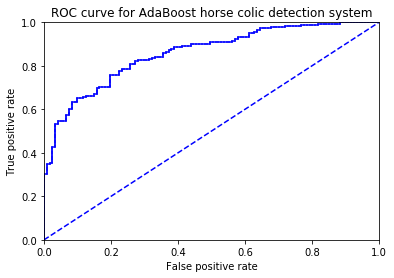

the Area Under the Curve is:  0.8582969635063604


In [26]:
def adaBoostTrainDS(dataArr,classLabels,numIt=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m)   #init D to all equal
    aggClassEst = mat(zeros((m,1)))
    for i in range(numIt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)#build Stump
        print("D:",D.T)
        alpha = float(0.5*log((1.0-error)/max(error,1e-16)))#calc alpha, throw in max(error,eps) to account for error=0
        bestStump['alpha'] = alpha  
        weakClassArr.append(bestStump)                  #store Stump Params in Array
        print("classEst: ",classEst.T)
        expon = multiply(-1*alpha*mat(classLabels).T,classEst) #exponent for D calc, getting messy
        D = multiply(D,exp(expon))                              #Calc New D for next iteration
        D = D/D.sum()
        #calc training error of all classifiers, if this is 0 quit for loop early (use break)
        aggClassEst += alpha*classEst
        print("aggClassEst: ",aggClassEst.T)
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total error: ",errorRate)
        if errorRate == 0.0: break
    return weakClassArr, aggClassEst

datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray, aggClassEst = adaBoostTrainDS(datArr, labelArr, 10)
plotROC(aggClassEst.T, labelArr)